# Gromacs - HECBioSim Benchmarks

Results from the [Gromacs](http://www.gromacs.org/) molecular dynamics code on 3x [HECBioSim](http://www.hecbiosim.ac.uk/benchmarks) benchmarks:
- 61K atom system - 1WDN Glutamine-Binding Protein
- 1.4M atom system - A Pair of hEGFR Dimers of 1IVO and 1NQL
- 3M atom system - A Pair of hEGFR tetramers of 1IVO and 1NQL

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The plots below are for the most-recent test on each system/partition/environment combination. They plot the "ns_per_day" performance vs. the number of nodes used for each run. Higher values are better performance.

In each case the number of tasks per node should be equal to the number of (hardware) cores.

Gromacs_61k:


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,29.704,29.751
2,50.724,48.086
4,77.434,74.908
8,86.011,71.901
16,77.991,76.629


Gromacs_1400k:


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,1.494,1.503
2,2.927,2.925
4,5.544,5.465
8,9.659,8.920
16,12.577,12.105


Gromacs_3000k:


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,0.646,0.647
2,1.283,1.283
4,2.537,2.536
8,4.749,4.685
16,6.793,6.984


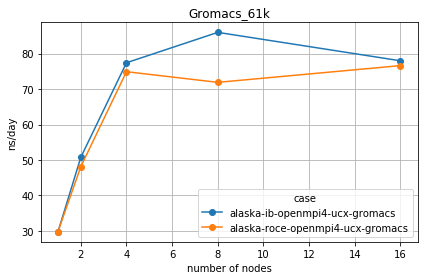

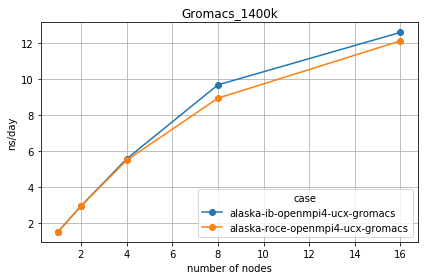

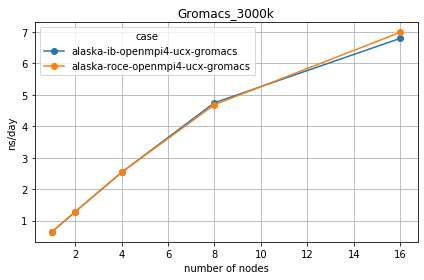

In [5]:
for test in ['Gromacs_61k', 'Gromacs_1400k', 'Gromacs_3000k']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_nodes', 'ns_per_day')
    ax = table.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('ns/day')
    ax.set_title(test)
    plt.tight_layout()
    print('%s:' % test)
    display(HTML(table.to_html()))


# Performance History

The plots below show all performance variables (i.e. maximum/minimum values) for all tests in the repository, grouped by system/partition/environment.

../modules/plots.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1)
../modules/plots.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1)
../modules/plots.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, n

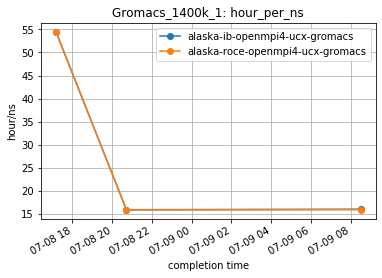

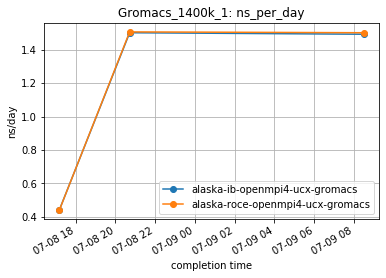

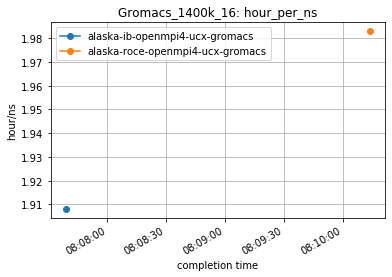

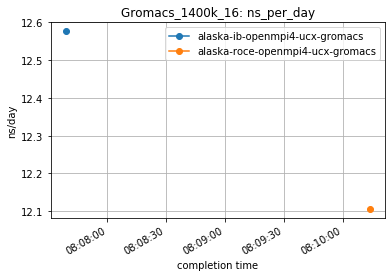

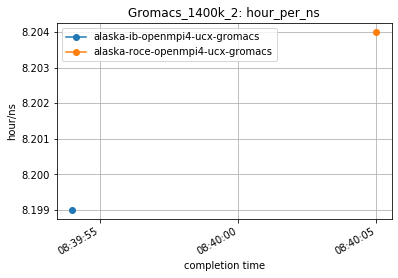

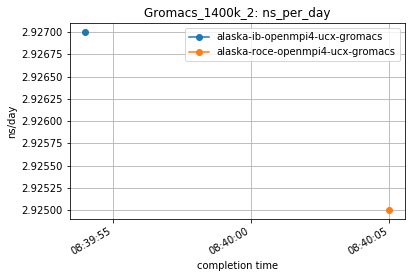

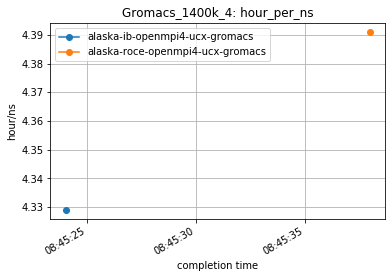

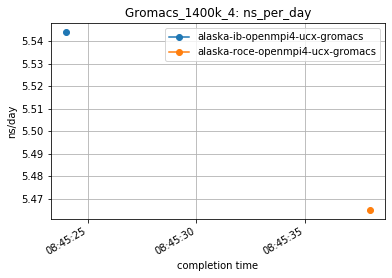

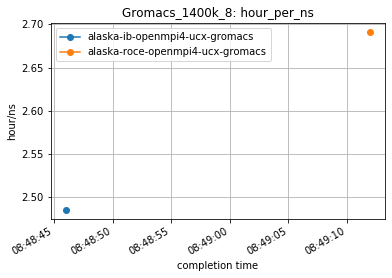

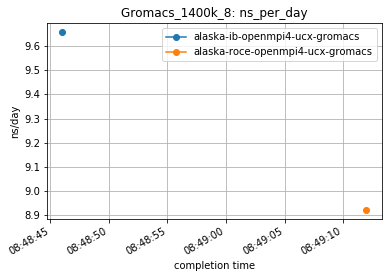

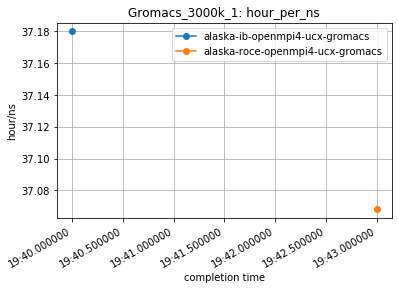

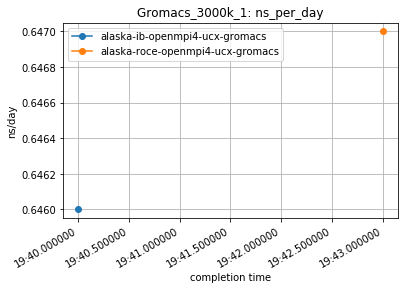

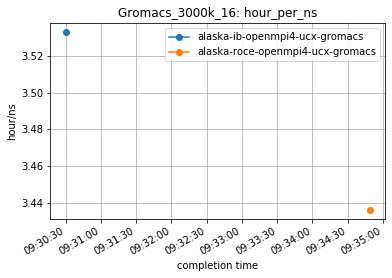

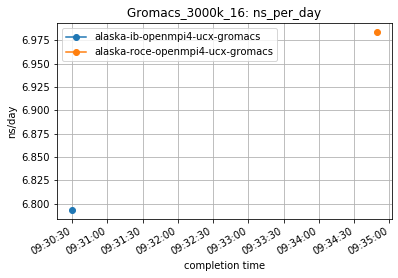

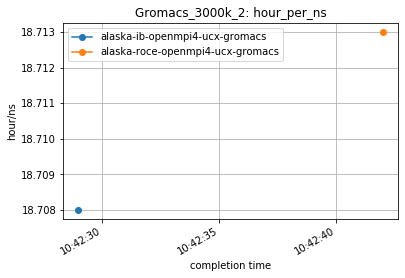

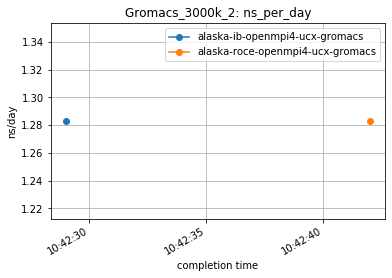

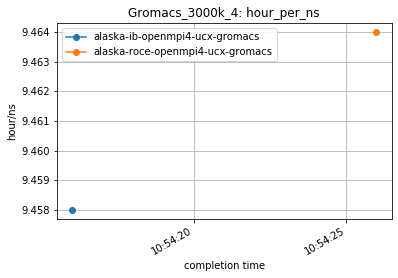

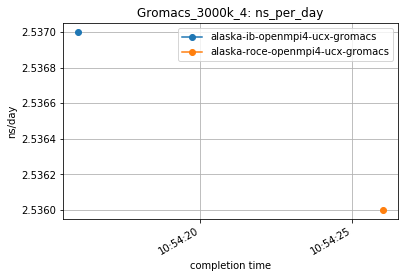

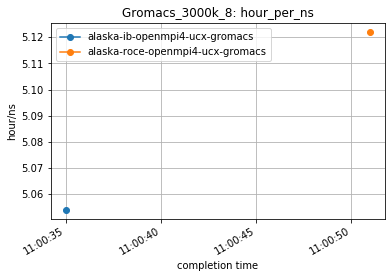

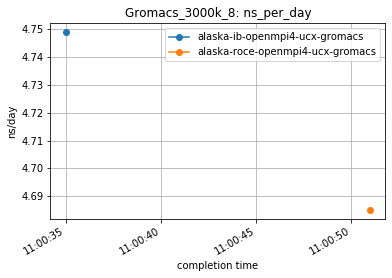

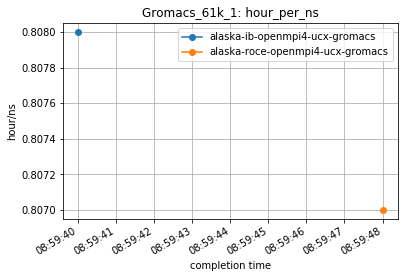

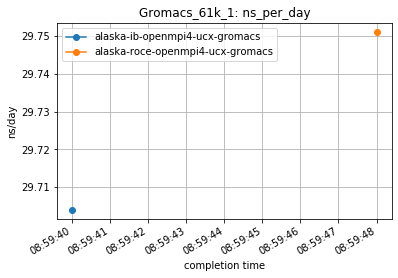

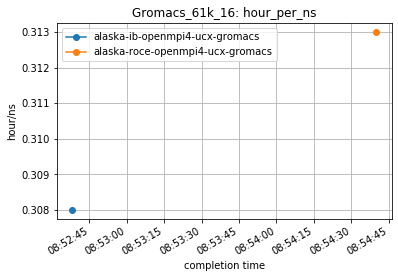

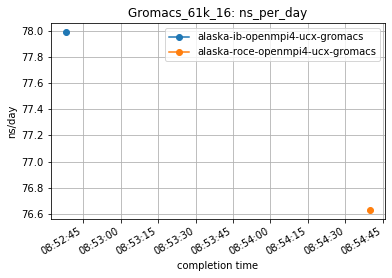

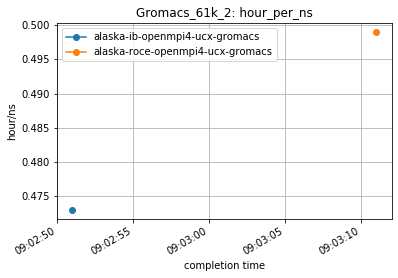

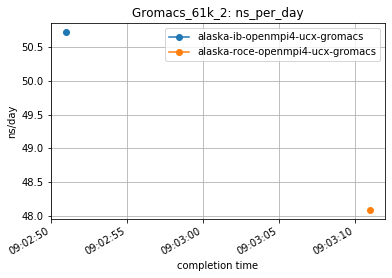

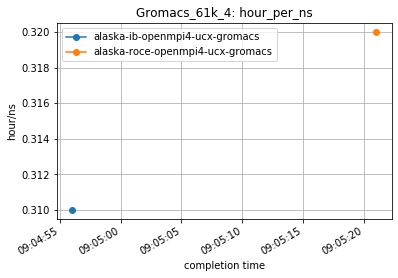

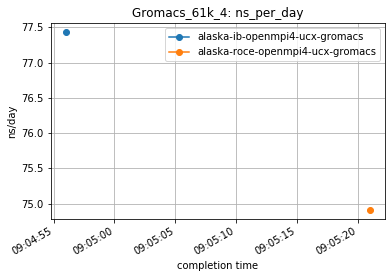

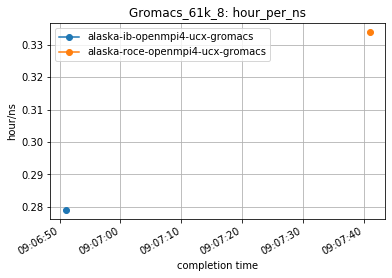

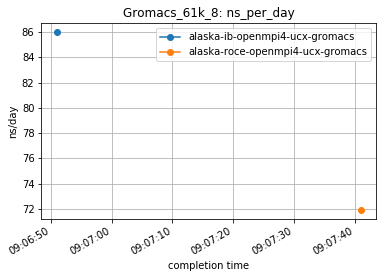

In [3]:
perf_records = modules.utils.load_perf_logs('../perflogs', "Gromacs_", '.log')
modules.plots.plot_perf_history(perf_records)
